In [1]:
%load_ext autoreload
%autoreload 2

import os
import pickle
import sys
from pathlib import Path
import datetime
import lab.torch as B
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from wbml import plot
import tueplots
from collections import defaultdict
torch.set_printoptions(profile='full') # 'short'

colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)


from tueplots import bundles, fontsizes, figsizes
plt.rcParams.update({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()})
matplotlib.rcParams["figure.dpi"] = 300  # for high quality, retina plots


from wbml import plot

### Locations

In [2]:
img_folder = 'tmp'

In [3]:
# include = [
#             # Adult GVI
#             "draft_results/Adult/GVI/A/07-24-13.50.19_sync-mfvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-gvi",
#             "draft_results/Adult/GVI/A/07-24-14.46.53_seq-pvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-100m-gvi",

#             # Bank GVI
#             "draft_results/Bank/GVI/A/07-24-13.54.22_seq-mfvi-bank-1c-10g-1000l-nealprior-128b-0-02lr-2s-gvi",
#             "draft_results/Bank/GVI/A/07-24-14.48.55_seq-pvi-bank-1c-10g-1000l-nealprior-128b-0-02lr-2s-100m",

#             # Bank Seq
#             "draft_results/Bank/Seq/A/07-24-13.01.24_seq-pvi-bank-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m",
#             "draft_results/Bank/Seq/A/07-24-13.21.51_seq-mfvi-bank-10c-10g-1000l-nealprior-128b-0-02lr-2s",
            
#             # Adult Seq
#             "draft_results/Adult/Seq/A/07-24-10.11.10_seq-pvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m-project-tight",
#             "draft_results/Adult/Seq/A/07-24-10.12.05_seq-mfvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-equaltogi",
#             # "draft_results/Adult/Seq/B/07-25-16.02.09_seq-pvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s-100m",
#             # "draft_results/Adult/Seq/B/07-25-17.56.14_seq-mfvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s",
            

#             # Bank - Split B
#             # "draft_results/Bank/Seq/B/07-25-17.58.15_seq-pvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s-100m", 
#             # "draft_results/Bank/Seq/B/07-25-19.29.52_seq-mfvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s",

#                 # lower lr
#             # "draft_results/Adult/Seq/B/07-28-16.00.03_seq-pvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-005lr-2s-100m",
#             # "draft_results/Adult/Seq/B/07-28-16.01.36_seq-mfvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-005lr-2s",
#             # "draft_results/Adult/Seq/B/07-28-16.38.00_seq-mfvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-01lr-2s",

#                 # HPC!
#             "draft_results/Bank/Seq/B/07-29-11.03.32_seq-pvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-0005lr-2s-100m-verify",
#             # "draft_results/Bank/Seq/B/07-29-16.57.02_seq-pvi-bank-10c-10g-2000l-nealprior-splitb-128b-0-001lr-2s-100m",
#             "draft_results/Bank/Seq/B/07-29-11.46.44_seq-mfvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-0005lr-2s",
            
#             # Bank Sync
#             "draft_results/Bank/Sync/B/07-29-17.11.15_sync-pvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-001lr-2s-10m",
#             "draft_results/Bank/Sync/A/07-26-13.29.58_sync-pvi-bank-10c-10g-2000l-nealprior-splita-128b-0-02lr-2s-100m-longer-l",
#             "draft_results/Bank/Sync/A/07-24-16.00.58_sync-mfvi-bank-10c-10g-1000l-nealprior-128b-0-02lr-2s",

#             # Adult Sync
#             "draft_results/Adult/Sync/A/07-24-12.41.02_sync-pvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m",
#             "draft_results/Adult/Sync/A/07-24-12.41.48_sync-mfvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s",

# ]

In [21]:
include = {
    # GVI
    # "results_newer/Bank/A/GVI/08-04-04.49.06_seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-10m-20p",
    # "results_newer/Bank/A/GVI/08-04-04.24.43_seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p",
    "results_newer/Bank/A/GVI/08-04-18.55.32_seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-100p",
    "results_newer/Bank/A/GVI/08-04-20.44.41_seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-10m-100p",
    "results_newer/Bank/A/GVI/08-04-09.28.52_seq-mfvi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p",
    "results_newer/Bank/A/GVI/08-04-09.28.44_seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p",

    # Seq
    "results_newer/Bank/A/Seq/08-04-01.47.16_seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-10m-20p",
    "results_newer/Bank/A/Seq/08-04-01.51.34_seq-gi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p",
    "results_newer/Bank/A/Seq/08-04-13.42.19_seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p",
    "results_newer/Bank/A/Seq/08-04-09.30.36_seq-mfvi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p",
}

In [22]:
########### READ LOG FILES ###########

main_dir = os.path.dirname(os.path.abspath(os.getcwd()))
res = "results_newer/"
res_dir = os.path.join(main_dir, res)

infinite_defaultdict = lambda: defaultdict(infinite_defaultdict)
logs = infinite_defaultdict()

# Column headers
pvi_name = "PVI"
variational_name = "Method"
client_name = "Client"
split_name = "Split"
dataset_name = 'Dataset'
experiment_name ='Experiment name'
num_clients_name = 'Number of clients'
prior_name = 'Prior'

for dataset_type in os.listdir(res_dir):
    if dataset_type in ["Adult", "Bank", "Credit"]:
        for split_type in os.listdir(os.path.join(res_dir, dataset_type)):
            for pvi_type in os.listdir(os.path.join(res_dir, dataset_type, split_type)):
                
                exp_dir = os.path.join(res_dir, dataset_type, split_type, pvi_type)

                for exp in os.listdir(exp_dir):
                    q_type = exp.split('_')[1].split('-')[1]
                    num_clients = int(exp.split('_')[1].split('-')[3].split('c')[0])
                    # Erroneous file naming
                    if q_type == 'pvi': q_type = 'gi'
                    
                    metrics_dir = os.path.join(exp_dir, exp, "metrics")
                    _exp_name = '-'.join(exp.split('_')[1:])
                    prior_type = 'Std' if 'std' in _exp_name else 'Neal'

                    # Exclude experiments in array
                    if os.path.join(res, dataset_type, split_type, pvi_type, exp) in include:
                        
                        current_df = logs[dataset_type][pvi_type][split_type][q_type][prior_type]

                        # Existing log file
                        if type(current_df[experiment_name]) == str:
                            # OVERWRITE EXISTING LOG FILE
                            print(f"{dataset_type}/{pvi_type}/{split_type}/{q_type}/{prior_type}: {current_df[experiment_name]} ==> {_exp_name}")
                        else:
                            print(f"{dataset_type}/{pvi_type}/{split_type}/{q_type}/{prior_type} = {_exp_name}")

                        # Set logs[...] to current experiment
                        current_df[experiment_name] = _exp_name
                        
                        # Load metrics
                        for log_name in os.listdir(metrics_dir):
                            name = log_name.split('_')[0]
                            
                            current_df[name] = pd.read_csv(os.path.join(metrics_dir, log_name))

                            # Add column values
                            current_df[name][pvi_name] = pvi_type.upper()
                            current_df[name][variational_name] = q_type.upper()
                            current_df[name][split_name] = split_type.upper()
                            current_df[name][dataset_name] = dataset_type
                            current_df[name][prior_name] = prior_type
                            if name != 'server':
                                current_df[name][client_name] = name
                            current_df[name][num_clients_name] = num_clients
                            current_df[name][experiment_name] = _exp_name

Bank/Seq/A/mfvi/Neal = seq-mfvi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p
Bank/Seq/A/mfvi/Std = seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p
Bank/Seq/A/gi/Std = seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-10m-20p
Bank/Seq/A/gi/Neal = seq-gi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p
Bank/GVI/A/gi/Std = seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-10m-100p
Bank/GVI/A/mfvi/Neal = seq-mfvi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p
Bank/GVI/A/mfvi/Std = seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p
Bank/GVI/A/gi/Neal = seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-100p


Merge dataframes for plotting purposes.

In [23]:
clients = []
for dataset, d in logs.items():
    for pvi_setting, dd in d.items():
        for split_setting, ddd in dd.items():
            for q_setting, dddd in ddd.items():
                for prior_setting, ddddd in dddd.items():
                    for name, log in ddddd.items():
                        if name != experiment_name and name != 'server': clients.append(log)

client = pd.concat(clients, ignore_index=True)

In [24]:
servers = []

for dataset, d in logs.items():
    for pvi_setting, dd in d.items():
        for split_setting, ddd in dd.items():
            for q_setting, dddd in ddd.items():
                for prior_setting, ddddd in dddd.items():
                    for name, log in ddddd.items():
                        if name != experiment_name and name == 'server': servers.append(log)

server = pd.concat(servers, ignore_index=True)

In [25]:
server.groupby(by=[dataset_name, split_name, pvi_name, split_name, variational_name, experiment_name]).size()

Dataset  Split  PVI  Split  Method  Experiment name                                                       
Bank     A      GVI  A      GI      seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-100p             11
                                    seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-10m-100p              11
                            MFVI    seq-mfvi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p      11
                                    seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p       11
                SEQ  A      GI      seq-gi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p            101
                                    seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-10m-20p             101
                            MFVI    seq-mfvi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p     88
                                    seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-ran

In [26]:
server.groupby(by=[variational_name, dataset_name, split_name, pvi_name, split_name, variational_name, experiment_name]).size()

Method  Dataset  Split  PVI  Split  Method  Experiment name                                                       
GI      Bank     A      GVI  A      GI      seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-100p             11
                                            seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-10m-100p              11
                        SEQ  A      GI      seq-gi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p            101
                                            seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-10m-20p             101
MFVI    Bank     A      GVI  A      MFVI    seq-mfvi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p      11
                                            seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p       11
                        SEQ  A      MFVI    seq-mfvi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p     88
                               

# Plotting

test mll

In [32]:
dataset = "Bank"
split = "A"
omit_sync_mfvi = True
save_plot = False

data = server.loc[server[split_name] == split]
data = data.loc[data[dataset_name] == dataset]
data = data.loc[data[prior_name] == 'Neal']

if omit_sync_mfvi:
    data = data.loc[~((data[pvi_name] == 'SYNC') & (data[variational_name] == 'MFVI'))]

data = data.sort_values(by=[variational_name, split_name, dataset_name, prior_name, experiment_name, 'communications'])

append_file_name = ""

# Check whether these are the experiments you want to plot.
data.groupby(by=[variational_name, dataset_name, split_name, prior_name, experiment_name]).size()

Method  Dataset  Split  Prior  Experiment name                                                       
GI      Bank     A      Neal   seq-gi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p            101
                               seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-100p             11
MFVI    Bank     A      Neal   seq-mfvi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p     88
                               seq-mfvi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p      11
dtype: int64

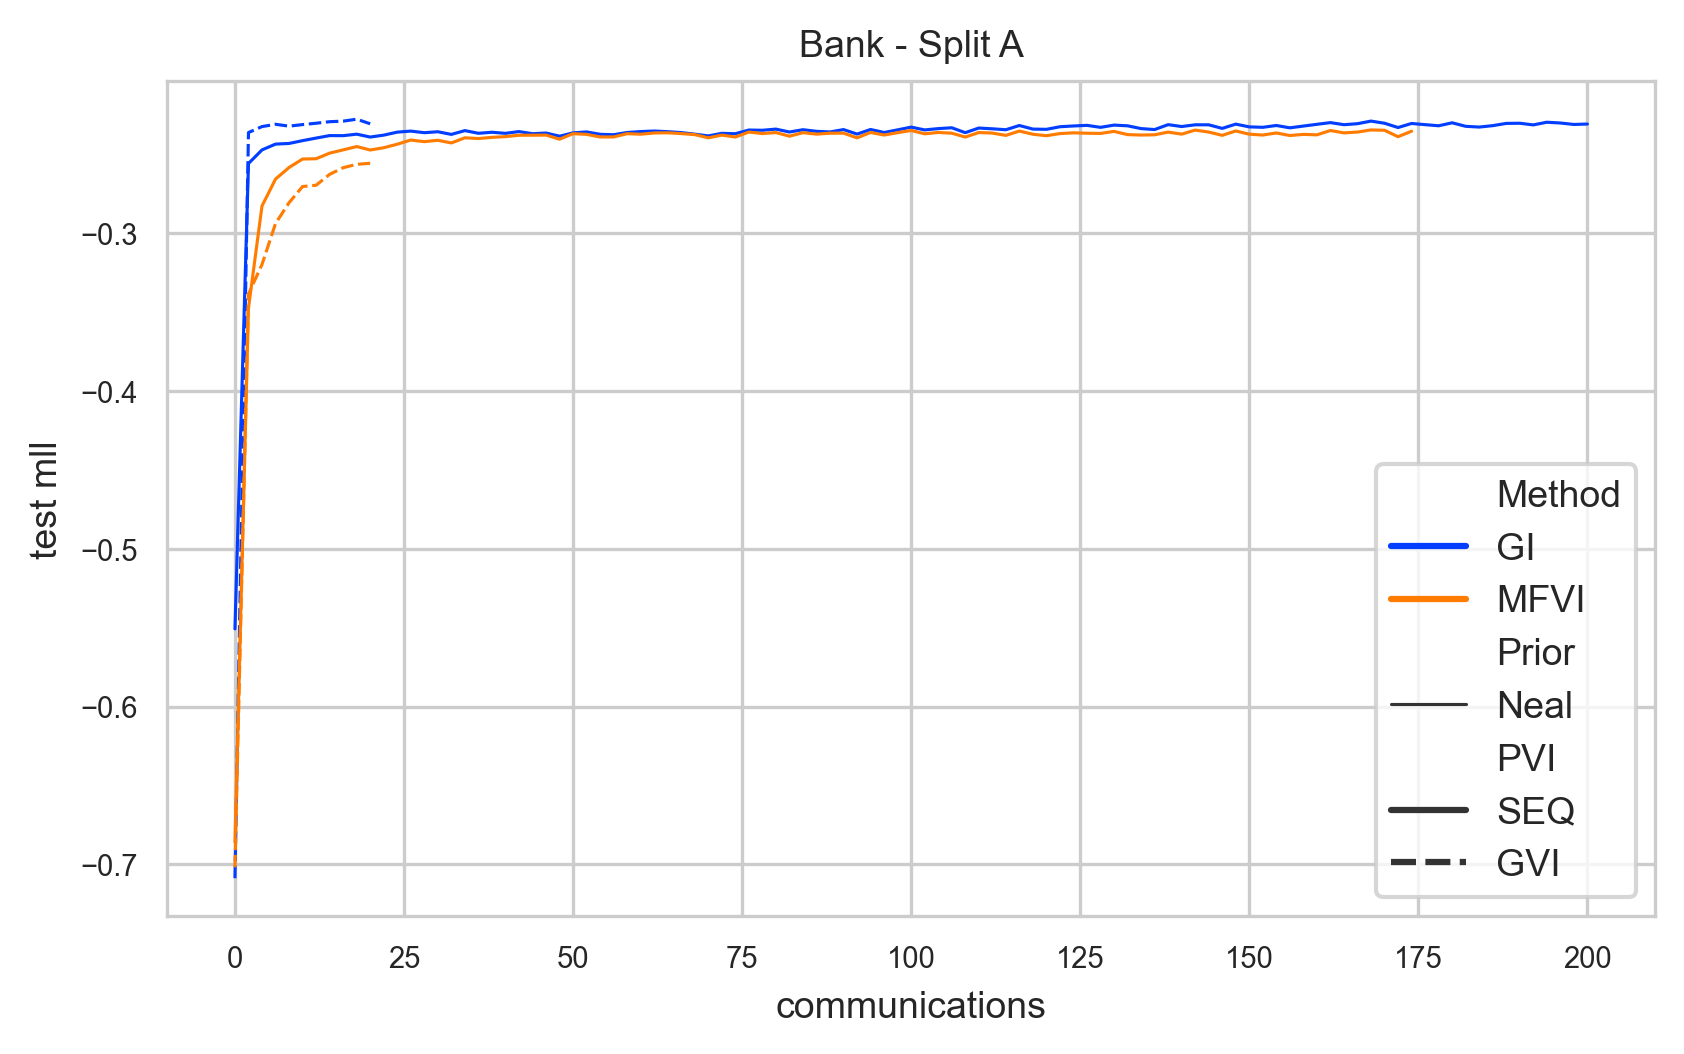

Method  Dataset  Split  Prior  Experiment name                                                       
GI      Bank     A      Neal   seq-gi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p            101
                               seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-100p             11
MFVI    Bank     A      Neal   seq-mfvi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p     88
                               seq-mfvi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-rand-mean-20p      11
dtype: int64


In [41]:
_start = datetime.datetime.utcnow()
_time = _start.strftime("%m-%d-%H-%M")

with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)

    x_metric = 'communications'
    y_metric = 'test_mll'
    
    sns.lineplot(data=data, x=x_metric, y=y_metric, ax=ax, hue=variational_name, style=pvi_name, size=prior_name)
    
    # ax.set_ylim(-0.24, -0.2275)
    # ax.set_xlim(0, 25)
    ax.set_title(f'{dataset} - Split {split}')
    ax.set_ylabel(' '.join(y_metric.split('_')))
    ax.set_xlabel(' '.join(x_metric.split('_')))
    ax.legend(loc="lower right", prop={"size": 9})

    file_name = f"./{img_folder}/{dataset}_{split}_{_time}_server_{x_metric}_{y_metric}"
    # if omit_sync_mfvi: file_name += "_omit_sync_mfvi"

    file_name += append_file_name
    if save_plot: plt.savefig(file_name)
    plt.show()

print(data.groupby(by=[variational_name, dataset_name, split_name, prior_name, experiment_name]).size())

### Client

In [40]:
client.columns

Index(['global_iteration', 'local_iteration', 'total_iteration', 'vfe', 'll',
       'kl', 'error', 'PVI', 'Method', 'Split', 'Dataset', 'Prior', 'Client',
       'Number of clients', 'Experiment name'],
      dtype='object')

In [41]:
dataset = "Bank"
split = "A"
omit_sync_mfvi = True
save_plot = False

data = client.loc[client[split_name] == split]
data = data.loc[data[dataset_name] == dataset]


if omit_sync_mfvi:
    data = data.loc[~((data[pvi_name] == 'SYNC') & (data[variational_name] == 'MFVI'))]

data = data.sort_values(by=[variational_name, split_name, dataset_name, experiment_name, 'total_iteration'])

# Check whether these are the experiments you want to plot.
pd.unique(data[experiment_name])

array(['seq-gi-bank-10c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p',
       'seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-10m-20p',
       'seq-gi-bank-1c-10g-10000l-neal-splita-256b-0-001lr-2s-10m-20p',
       'seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-10m-20p'],
      dtype=object)

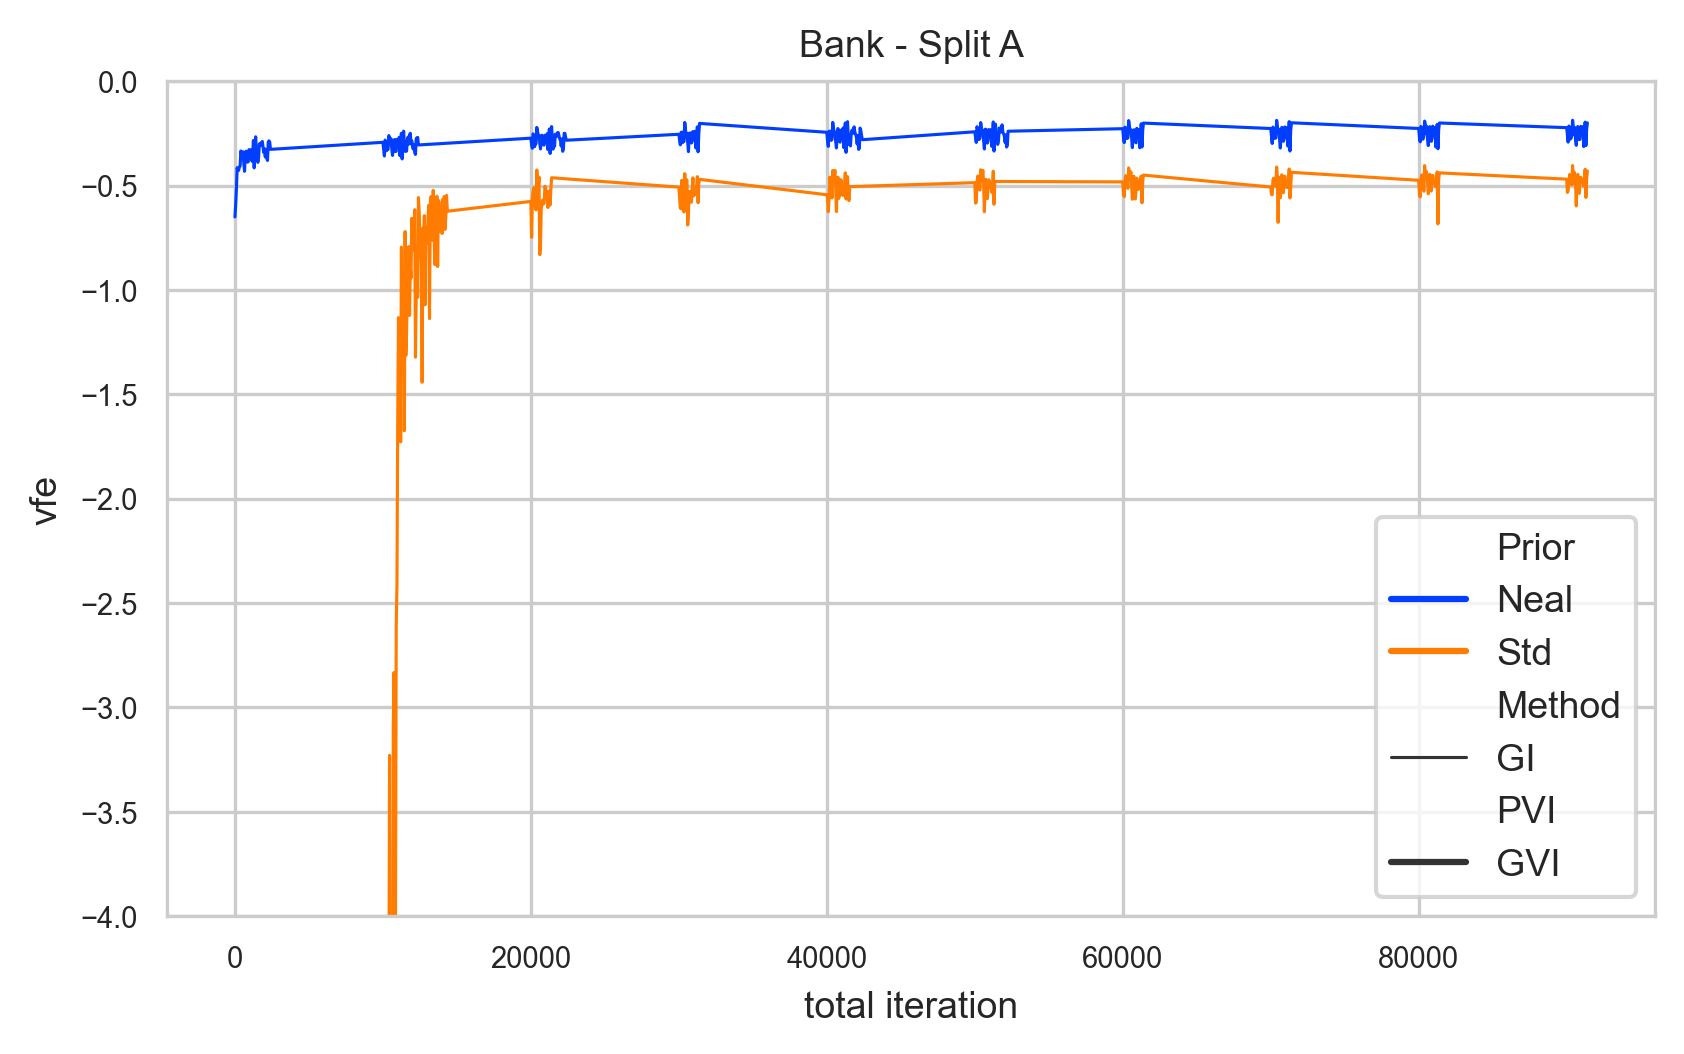

In [54]:
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)
    
    y_metric = "vfe"
    x_metric = "total_iteration"
    
    # sns.lineplot(data=data, x=x_metric, y=y_metric, ax=ax, size=prior_name, hue=variational_name, style=pvi_name)
    sns.lineplot(data=data.loc[data[pvi_name] == 'GVI'], x=x_metric, y=y_metric, ax=ax, hue=prior_name, size=variational_name, style=pvi_name)
    
    ax.set_title(f'{dataset} - Split {split}')    
    ax.set_ylabel(' '.join(y_metric.split('_')))
    ax.set_xlabel(' '.join(x_metric.split('_')))
    ax.legend(loc="lower right", prop={"size": 9})

    ax.set_ylim(-4, 0)

    file_name = f"./{img_folder}/{split}_{dataset}_client_{x_metric}_{y_metric}"
    if omit_sync_mfvi: file_name += "_omit_sync_mfvi"

    if save_plot: plt.savefig(file_name)
    plt.show()
